In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Automobile_insurance_fraud.csv")
df.head(10)

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0.1,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1.1,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
5,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
6,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
7,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
8,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N
9,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,FEMALE,Masters,exec-managerial,dancing,other-relative,38400,0,06-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Northbend,1558 1st Ridge,22,1,YES,2,2,?,87010,7910,15820,63280,Ford,F150,2002,N


In [3]:
df.dtypes

328                           int64
48                            int64
521585                        int64
17-10-2014                   object
OH                           object
250/500                      object
1000                          int64
1406.91                     float64
0                             int64
466132                        int64
MALE                         object
MD                           object
craft-repair                 object
sleeping                     object
husband                      object
53300                         int64
0.1                           int64
25-01-2015                   object
Single Vehicle Collision     object
Side Collision               object
Major Damage                 object
Police                       object
SC                           object
Columbus                     object
9935 4th Drive               object
5                             int64
1                             int64
YES                         

In [4]:
df.columns

Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')

In [5]:
df.shape

(999, 39)

In [6]:
df.nunique()

328                         391
48                           46
521585                      999
17-10-2014                  950
OH                            3
250/500                       3
1000                          3
1406.91                     990
0                            11
466132                      994
MALE                          2
MD                            7
craft-repair                 14
sleeping                     20
husband                       6
53300                       338
0.1                         354
25-01-2015                   60
Single Vehicle Collision      4
Side Collision                4
Major Damage                  4
Police                        5
SC                            7
Columbus                      7
9935 4th Drive              999
5                            24
1                             4
YES                           3
1.1                           3
2                             4
YES.1                         3
71610   

In [11]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Fraud.reported', data=df, hue='Fraud.reported')

ValueError: Could not interpret input 'Fraud.reported'

In [12]:
df['fraud_reported'].value_counts()

KeyError: 'fraud_reported'

In [13]:
df['incident_state'].value_counts()

KeyError: 'incident_state'

In [14]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

KeyError: 'incident_state'

<Figure size 1000x600 with 0 Axes>

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

KeyError: 'incident_date'

<Figure size 1800x600 with 0 Axes>

In [16]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

KeyError: 'policy_state'

<Figure size 1000x600 with 0 Axes>

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('Incident type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

KeyError: 'Incident type'

<Figure size 1000x600 with 0 Axes>

In [21]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

ValueError: Could not interpret input 'incident_state'

<Figure size 1000x600 with 0 Axes>

In [22]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

ValueError: Could not interpret input 'insured_education_level'

<Figure size 1000x600 with 0 Axes>

In [23]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

KeyError: 'insured_sex'

<Figure size 1000x600 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

KeyError: 'insured_relationship'

<Figure size 1000x600 with 0 Axes>

In [25]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12)

KeyError: 'incident_type'

<Figure size 1000x600 with 0 Axes>

In [26]:
df["insured_occupation"].value_counts()

KeyError: 'insured_occupation'

In [27]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

KeyError: 'auto_make'

<Figure size 1000x600 with 0 Axes>

In [28]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

KeyError: 'fraud_reported'

In [29]:

df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

KeyError: "['policy_number', 'insured_zip', 'policy_bind_date', 'incident_date', 'incident_location', '_c39', 'auto_year', 'incident_hour_of_the_day'] not found in axis"

In [30]:
df.head(2)

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0.1,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1.1,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N


In [31]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                            0
17-10-2014                  0
OH                          0
250/500                     0
MALE                        0
MD                          0
craft-repair                0
sleeping                    0
husband                     0
25-01-2015                  0
Single Vehicle Collision    0
Side Collision            178
Major Damage                0
Police                      0
SC                          0
Columbus                    0
9935 4th Drive              0
YES                       360
YES.1                     343
Saab                        0
92x                         0
Y                           0


In [32]:
df.collision_type.value_counts()

AttributeError: 'DataFrame' object has no attribute 'collision_type'

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

KeyError: 'collision_type'

<Figure size 1000x600 with 0 Axes>

In [34]:
df.police_report_available.value_counts()

AttributeError: 'DataFrame' object has no attribute 'police_report_available'

In [35]:
df.columns

Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')

In [36]:
df._get_numeric_data().head()

,328,48,521585,1000,1406.91,0,466132,53300,0.1,5,1,1.1,2,71610,6510,13020,52080,2004
0,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
1,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
2,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
3,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
4,256,39,104594,1000,1351.10,0,478456,0,0,19,3,0,2,64100,6410,6410,51280,2003


In [37]:
df._get_numeric_data().columns

Index(['328', '48', '521585', '1000', '1406.91', '0', '466132', '53300', '0.1',
       '5', '1', '1.1', '2', '71610', '6510', '13020', '52080', '2004'],
      dtype='object')

In [38]:
df.select_dtypes(include=['object']).columns

Index(['17-10-2014', 'OH', '250/500', 'MALE', 'MD', 'craft-repair', 'sleeping',
       'husband', '25-01-2015', 'Single Vehicle Collision', 'Side Collision',
       'Major Damage', 'Police', 'SC', 'Columbus', '9935 4th Drive', 'YES',
       'YES.1', 'Saab', '92x', 'Y'],
      dtype='object')

In [39]:
dummies = pd.get_dummies(df[[
    'policy_state', 
    'policy_csl', 
    'insured_sex', 
    'insured_education_level',
    'insured_occupation', 
    'insured_hobbies', 
    'insured_relationship',
    'incident_type', 
    'incident_severity',
    'authorities_contacted', 
    'incident_state', 
    'incident_city',
    'auto_make', 
    'auto_model',
    'incident_period_of_day']])

dummies = dummies.join(df[[
    'collision_type', 
    'property_damage', 
    'police_report_available', 
    "fraud_reported"]])

dummies.head()

KeyError: "None of [Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',\n       'insured_occupation', 'insured_hobbies', 'insured_relationship',\n       'incident_type', 'incident_severity', 'authorities_contacted',\n       'incident_state', 'incident_city', 'auto_make', 'auto_model',\n       'incident_period_of_day'],\n      dtype='object')] are in the [columns]"

In [40]:
X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

NameError: name 'dummies' is not defined

In [41]:
len(X.columns)

NameError: name 'X' is not defined

In [42]:
X.head(2)

NameError: name 'X' is not defined

In [43]:
from sklearn.preprocessing import LabelEncoder
X['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
X[['collision_type', 'collision_en']]

NameError: name 'dummies' is not defined

In [44]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)

X.head(10)

NameError: name 'X' is not defined

In [45]:
X = X.drop(columns = ['collision_type'])
X.head(2)

NameError: name 'X' is not defined

In [46]:
X = pd.concat([X, df._get_numeric_data()], axis=1)  # joining numeric columns
X.head(2)

NameError: name 'X' is not defined

In [47]:
X.columns

NameError: name 'X' is not defined

In [48]:
X = X.drop(columns = ['fraud_reported'])
X.columns

NameError: name 'X' is not defined

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

NameError: name 'X' is not defined

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
rfcg = rfc.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, predictions),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

NameError: name 'X_train' is not defined

In [52]:
rfcg

NameError: name 'rfcg' is not defined

In [53]:
from sklearn.metrics import confusion_matrix

import itertools


def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                      title='Random Forest-Confusion matrix')

NameError: name 'cnf_matrix' is not defined

<Figure size 640x480 with 0 Axes>

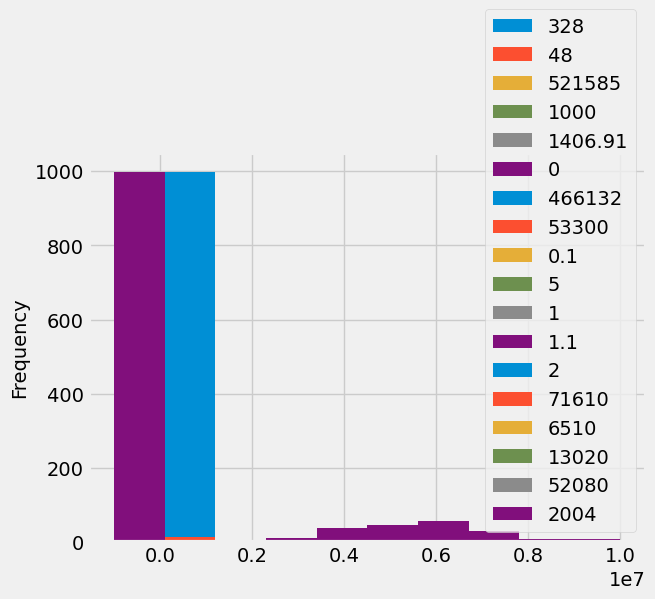

In [54]:
df.plot(kind='hist')
plt.show()

In [55]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

xgb = XGBClassifier()
logreg2= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dtclf = DecisionTreeClassifier(max_depth=5)
rfclf = RandomForestClassifier()


seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.